## Project Decription

A jewelry company wants to put in a bid to purchase a large set of diamonds, but is unsure how much it should bid. You are 
required to make recommendation on how much to bid. The company generally purchases diamonds from distributors at 70% of the actual price, so your recommended bid price should represent that.

## Background Information

A diamond distributor has recently decided to exit the market and has put up a set of 3,000 diamonds up for auction. Seeing this as a great opportunity to expand its inventory, a jewelry company has shown interest in making a bid. To decide how much to bid, you will use a large database of diamond prices to build a model to predict the price of a diamond based on its attributes. Then you will use the results of that model to make a recommendation for how much the company should bid.

### About The Data

There are two datasets. diamonds.csv contains the data used to build the regression model. new_diamonds_new.csv contains the data for the diamonds the company would like to purchase. Both datasets contain carat, cut, and clarity data for each diamond. Only the diamonds.csv dataset has prices. You'll be predicting prices for the new_diamonds.csv dataset.

### About The Features

CARAT represents the weight of the diamond, and is a numerical variable.
CUT represents the quality of the cut of the diamond, and falls into 5 categories: fair, good, very good, ideal, and premium.
CLARITY represents the internal purity of the diamond, and falls into 8 categories: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, and IF (in order from least to most pure).
COLOR represents the color of the diamond, and is rated D through J, with D being the most colorless (and valuable) and J being the most yellow.

#### Question 1
What decisions need to be made?

We want to compare the qualities of the previous diamond purchased with the new diamonds to enable us determine and decide on what price to bid 

#### Question2
What information do we need to inform this decision?

Information needed includes Carat, Cut, Clarity, Color and Price

#### Question 3
What type of model should be used?

Model options includes Linear Regression Model, Decision Tree Model, Forest Model as it is a data rich numeric file.

#### Question 4
What are the feature variables and the output variable?

Feature Variables include: Carat, Cut, Clarity, Colour
Output Variable includes: Price

In [1]:
# import the libraries
import pandas as pd

In [2]:
# import the training dataset
diamonds = pd.read_csv("Train_DS_diamonds.csv")

In [3]:
# inspect the dataset
diamonds

,carat,cut,color,clarity,price
0,0.51,Premium,F,VS1,1749
1,2.25,Fair,G,I1,7069
2,0.70,Very Good,E,VS2,2757
3,0.47,Good,F,VS1,1243
4,0.30,Ideal,G,VVS1,789
...,...,...,...,...,...
49995,0.71,Ideal,H,VVS1,2918
49996,0.43,Ideal,G,VVS2,1056
49997,1.14,Premium,G,VS2,6619
49998,1.01,Premium,E,VS2,6787


In [4]:
print(diamonds["price"])

0        1749
1        7069
2        2757
3        1243
4         789
         ... 
49995    2918
49996    1056
49997    6619
49998    6787
49999    9428
Name: price, Length: 50000, dtype: int64


In [5]:
sum_price = print(diamonds["price"].sum())

196955175


In [6]:
print(diamonds["price"].sum() * 0.7)

137868622.5


In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   price    50000 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


In [8]:
# do some feature engineering on the dataset 

def cut_transform(diamonds):
    value_in_column = diamonds["cut"]
    if value_in_column == "Fair":
        result = 1
    elif value_in_column == "Good":
        result = 2
    elif value_in_column == "Very Good":
        result = 3
    elif value_in_column == "Ideal":
        result = 4
    elif value_in_column == "Premium":
        result = 5
    return result

In [9]:
diamonds["cut_ord"] = diamonds.apply(cut_transform, axis = "columns")

In [10]:
def color_transform(diamonds):
    value_in_column = diamonds["color"]
    if value_in_column == "J":
        result = 1
    elif value_in_column == "I":
        result = 2
    elif value_in_column == "H":
        result = 3
    elif value_in_column == "G":
        result = 4
    elif value_in_column == "F":
        result = 5
    elif value_in_column == "E":
        result = 6
    elif value_in_column == "D":
        result = 7
    return result

In [11]:
diamonds["color_ord"] = diamonds.apply(color_transform, axis = "columns")

In [12]:
def clarity_transform(diamonds):
    value_in_column = diamonds["clarity"]
    if value_in_column == "I1":
        result = 1
    elif value_in_column == "SI2":
        result = 2
    elif value_in_column == "SI1":
        result = 3
    elif value_in_column == "VS2":
        result = 4
    elif value_in_column == "VS1":
        result = 5
    elif value_in_column == "VVS2":
        result = 6
    elif value_in_column == "VVS1":
        result = 7
    elif value_in_column == "IF":
        result = 8
    return result

In [13]:
diamonds["clarity_ord"] = diamonds.apply(clarity_transform, axis = "columns")

In [14]:
diamonds

,carat,cut,color,clarity,price,cut_ord,color_ord,clarity_ord
0,0.51,Premium,F,VS1,1749,5,5,5
1,2.25,Fair,G,I1,7069,1,4,1
2,0.70,Very Good,E,VS2,2757,3,6,4
3,0.47,Good,F,VS1,1243,2,5,5
4,0.30,Ideal,G,VVS1,789,4,4,7
...,...,...,...,...,...,...,...,...
49995,0.71,Ideal,H,VVS1,2918,4,3,7
49996,0.43,Ideal,G,VVS2,1056,4,4,6
49997,1.14,Premium,G,VS2,6619,5,4,4
49998,1.01,Premium,E,VS2,6787,5,6,4


In [15]:
X = diamonds.drop(columns = ["price","cut","color","clarity"])

In [16]:
X

,carat,cut_ord,color_ord,clarity_ord
0,0.51,5,5,5
1,2.25,1,4,1
2,0.70,3,6,4
3,0.47,2,5,5
4,0.30,4,4,7
...,...,...,...,...
49995,0.71,4,3,7
49996,0.43,4,4,6
49997,1.14,5,4,4
49998,1.01,5,6,4


In [17]:
y = diamonds["price"]

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# train your model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

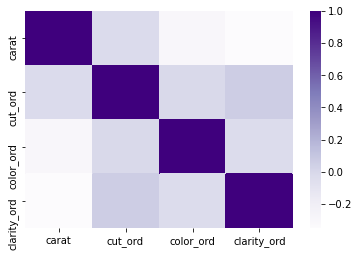

In [20]:
# find the correlation between the features
import seaborn as sns
feature_correlation = sns.heatmap(X.corr(), cmap = "Purples")

In [21]:
# create test and train samples from the train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3)

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# predict the test samples
test_prediction = model.predict(X_test)
display(pd.DataFrame(test_prediction))

# predict the train samples
train_prediction = model.predict(X_train)
display(pd.DataFrame(train_prediction))

,0
0,3498.954516
1,-552.107797
2,1488.510551
3,2910.827241
4,57.521286
...,...
14995,4839.931049
14996,2236.635825
14997,2468.577398
14998,11752.025645


,0
0,1140.207732
1,1507.477823
2,1120.228400
3,2900.754911
4,1371.638889
...,...
34995,5692.198398
34996,1040.401944
34997,3230.979796
34998,638.267320


# check the summary of the trained data
#R-Squared is from -1 to +1
#p value determines the importance of the variable to the model ranging form 0 to 1. >=0.05 is considered not important.
from regressors import stats
stats.summary(model, X, y, list(X.columns))

In [24]:
from regressors import stats 
stats.summary(model, X, y, list(X.columns))

Residuals:
      Min        1Q    Median        3Q        Max
-2780.364 1011.3962 2991.5875 5949.9693 37767.1885


Coefficients:
                Estimate  Std. Error   t value  p value
_intercept  -7170.167209   34.597835 -207.2432      0.0
carat        8770.933861   11.667858  751.7176      0.0
cut_ord       142.709758    4.108496   34.7353      0.0
color_ord     319.140495    2.539066  125.6921      0.0
clarity_ord   533.126855    2.779341  191.8177      0.0
---
R-squared:  0.90383,    Adjusted R-squared:  0.90383
F-statistic: 117470.76 on 4 features


In [25]:
#! pip install regressors

#### Make prediction

In [26]:
# import the dataset to be predicted
new_diamonds = pd.read_csv("Test_DS_new-diamonds.csv")

In [27]:
new_diamonds

,carat,cut,color,clarity
0,1.22,Premium,G,SI1
1,1.01,Good,G,VS2
2,0.71,Very Good,I,VS2
3,1.01,Ideal,D,SI2
4,0.27,Ideal,H,VVS2
...,...,...,...,...
2995,0.72,Ideal,F,SI2
2996,1.09,Premium,I,VS2
2997,1.05,Very Good,G,SI1
2998,0.70,Fair,G,SI1


In [28]:
# do some feature engineering on the dataset 

def cut_transform(new_diamonds):
    value_in_column = new_diamonds["cut"]
    if value_in_column == "Fair":
        result = 1
    elif value_in_column == "Good":
        result = 2
    elif value_in_column == "Very Good":
        result = 3
    elif value_in_column == "Ideal":
        result = 4
    elif value_in_column == "Premium":
        result = 5
    return result

In [29]:
new_diamonds["cut_ord"] = new_diamonds.apply(cut_transform, axis = "columns")

In [30]:
def color_transform(new_diamonds):
    value_in_column = new_diamonds["color"]
    if value_in_column == "J":
        result = 1
    elif value_in_column == "I":
        result = 2
    elif value_in_column == "H":
        result = 3
    elif value_in_column == "G":
        result = 4
    elif value_in_column == "F":
        result = 5
    elif value_in_column == "E":
        result = 6
    elif value_in_column == "D":
        result = 7
    return result

In [31]:
new_diamonds["color_ord"] = new_diamonds.apply(color_transform, axis = "columns")

In [32]:
def clarity_transform(new_diamonds):
    value_in_column = new_diamonds["clarity"]
    if value_in_column == "I1":
        result = 1
    elif value_in_column == "SI2":
        result = 2
    elif value_in_column == "SI1":
        result = 3
    elif value_in_column == "VS2":
        result = 4
    elif value_in_column == "VS1":
        result = 5
    elif value_in_column == "VVS2":
        result = 6
    elif value_in_column == "VVS1":
        result = 7
    elif value_in_column == "IF":
        result = 8
    return result

In [33]:
new_diamonds["clarity_ord"] = new_diamonds.apply(clarity_transform, axis = "columns")

In [34]:
new_diamonds = new_diamonds.drop(columns = ["cut","color","clarity"])

In [35]:
new_diamonds

,carat,cut_ord,color_ord,clarity_ord
0,1.22,5,4,3
1,1.01,2,4,4
2,0.71,3,2,4
3,1.01,4,7,2
4,0.27,4,3,6
...,...,...,...,...
2995,0.72,4,5,2
2996,1.09,5,2,4
2997,1.05,3,4,3
2998,0.70,1,4,3


In [36]:
# predict the prices of the new dataset
new_diamond_prediction = pd.DataFrame(model.predict(new_diamonds))

In [37]:
new_diamond_prediction

,0
0,7119.863435
1,5382.964905
2,2256.113515
3,5559.552196
4,-74.993421
...,...
2995,2377.700386
2996,5874.487898
2997,5343.385163
2998,1988.138795


In [38]:
# join the predicted prices column to the predicted dataset
predicted_diamonds = new_diamonds.join(new_diamond_prediction)

In [39]:
predicted_diamonds

,carat,cut_ord,color_ord,clarity_ord,0
0,1.22,5,4,3,7119.863435
1,1.01,2,4,4,5382.964905
2,0.71,3,2,4,2256.113515
3,1.01,4,7,2,5559.552196
4,0.27,4,3,6,-74.993421
...,...,...,...,...,...
2995,0.72,4,5,2,2377.700386
2996,1.09,5,2,4,5874.487898
2997,1.05,3,4,3,5343.385163
2998,0.70,1,4,3,1988.138795


In [40]:
# rename the predicted price column
predicted_diamonds = predicted_diamonds.rename(columns = {0:"pred_price"})
predicted_diamonds

,carat,cut_ord,color_ord,clarity_ord,pred_price
0,1.22,5,4,3,7119.863435
1,1.01,2,4,4,5382.964905
2,0.71,3,2,4,2256.113515
3,1.01,4,7,2,5559.552196
4,0.27,4,3,6,-74.993421
...,...,...,...,...,...
2995,0.72,4,5,2,2377.700386
2996,1.09,5,2,4,5874.487898
2997,1.05,3,4,3,5343.385163
2998,0.70,1,4,3,1988.138795


### Make Recommendations

#### Do some necessary calculations

In [41]:
#Find the sum of predicted price column?
#sum_price = cumsum(axis=None,columns(pred_price))
#sum_price = axis:{index(0), columns (pred_price)}
#sum_price = sum_price.cumsum (self, axis=None, skipna=True, *args, **kwargs)
#sum_price[[["pred_price"]].cumsum(axis=0)
#new_diamonds["Sum"]=new_diamonds["pred_price"].sum (axis=0)
#new_diamonds
#print(new_diamonds["cut_ord"])
#print(new_diamonds["cut_ord"].sum())
#print(new_diamonds["pred_price"])


In [42]:
print(predicted_diamonds["cut_ord"])

0       5
1       2
2       3
3       4
4       4
       ..
2995    4
2996    5
2997    3
2998    1
2999    3
Name: cut_ord, Length: 3000, dtype: int64


In [43]:
print(predicted_diamonds["cut_ord"].sum())

11286


In [44]:
print(predicted_diamonds["pred_price"])

0       7119.863435
1       5382.964905
2       2256.113515
3       5559.552196
4        -74.993421
           ...     
2995    2377.700386
2996    5874.487898
2997    5343.385163
2998    1988.138795
2999    5311.688303
Name: pred_price, Length: 3000, dtype: float64


In [45]:
#sum_price = print(predicted_diamonds["pred_price"].sum()) 
#OR
sum_price = (predicted_diamonds["pred_price"].sum())
print (sum_price)

11738443.26062572


In [46]:
#Take into account the 70% price to bid
#print(predicted_diamonds["pred_price"].sum() * 0.7)
#OR
sum_price*.7
print (sum_price*0.7)

8216910.282438003


In [47]:
print(predicted_diamonds["pred_price"].sum() * 0.4)

4695377.304250288


##### What price do you recommend that the company should bid?


Value of Diamonds purchased previously by the company was worth approximately 197 million however, the company buys at 70% of the actual price rate resulting in a purchase of approximately 138 million. 

A company willing to sell same number of Diamonds at approximately 12 million shows that these Diamonds are not the best of quality when compared to what the company will usually purchase however the diamonds can still be sold. 

I therefore will recommend that the company bids the product at a lower percentage than 70% which gives approximately 83 million hence would suggest to bid at 40% which gives 47 million to prevent high loss of capital or stuck capital due to delay in sales.

### Thank You.